In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path.append('..')

In [56]:
data = pd.read_csv('../Data/IBMCustomerChurn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [88]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [61]:
df = pd.get_dummies(data.iloc[:,[9,10,11,12,13,14]])
df

,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes
0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0
1,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0
2,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0
3,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0
4,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1
7039,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1
7040,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
7041,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0


In [62]:
df = df.drop(columns=['OnlineSecurity_No', 'OnlineSecurity_No internet service', 'OnlineBackup_No', 'OnlineBackup_No internet service', 'DeviceProtection_No', 'DeviceProtection_No internet service', 'TechSupport_No', 'TechSupport_No internet service', 'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingMovies_No', 'StreamingMovies_No internet service'])
df

,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
0,0,1,0,0,0,0
1,1,0,1,0,0,0
2,1,1,0,0,0,0
3,1,0,1,1,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
7038,1,0,1,1,1,1
7039,0,1,1,0,1,1
7040,1,0,0,0,0,0
7041,0,0,0,0,0,0


In [63]:
df = data.join(df)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,PaymentMethod,MonthlyCharges,TotalCharges,Churn,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,Electronic check,29.85,29.85,No,0,1,0,0,0,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Mailed check,56.95,1889.5,No,1,0,1,0,0,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,Mailed check,53.85,108.15,Yes,1,1,0,0,0,0
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Bank transfer (automatic),42.30,1840.75,No,1,0,1,1,0,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,Electronic check,70.70,151.65,Yes,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Mailed check,84.80,1990.5,No,1,0,1,1,1,1
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Credit card (automatic),103.20,7362.9,No,0,1,1,0,1,1
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,Electronic check,29.60,346.45,No,1,0,0,0,0,0
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,Mailed check,74.40,306.6,Yes,0,0,0,0,0,0


In [66]:
df_2 = df.drop(df.columns[[0,9,10,11,12,13,14]], axis=1).copy()
df_2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
0,Female,0,Yes,No,1,No,No phone service,DSL,Month-to-month,Yes,Electronic check,29.85,29.85,No,0,1,0,0,0,0
1,Male,0,No,No,34,Yes,No,DSL,One year,No,Mailed check,56.95,1889.5,No,1,0,1,0,0,0
2,Male,0,No,No,2,Yes,No,DSL,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,1,0,0,0,0
3,Male,0,No,No,45,No,No phone service,DSL,One year,No,Bank transfer (automatic),42.30,1840.75,No,1,0,1,1,0,0
4,Female,0,No,No,2,Yes,No,Fiber optic,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0,0,0,0,0,0


In [67]:
df_3 = pd.get_dummies(df_2.iloc[:,[0,2,3,5,6,7,9,13]])
df_3 = df_3.drop(df_3.columns[[0,2,4,6,8,9,11,13,14,16]], axis=1)
df_3.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,PaperlessBilling_Yes,Churn_Yes
0,0,1,0,0,0,0,1,0
1,1,0,0,1,0,0,0,0
2,1,0,0,1,0,0,1,1
3,1,0,0,0,0,0,0,0
4,0,0,0,1,0,1,1,1


In [72]:
df_4 = pd.concat([df_2, df_3],axis=1)
df_4

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,Contract,PaperlessBilling,...,StreamingTV_Yes,StreamingMovies_Yes,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,PaperlessBilling_Yes,Churn_Yes
0,Female,0,Yes,No,1,No,No phone service,DSL,Month-to-month,Yes,...,0,0,0,1,0,0,0,0,1,0
1,Male,0,No,No,34,Yes,No,DSL,One year,No,...,0,0,1,0,0,1,0,0,0,0
2,Male,0,No,No,2,Yes,No,DSL,Month-to-month,Yes,...,0,0,1,0,0,1,0,0,1,1
3,Male,0,No,No,45,No,No phone service,DSL,One year,No,...,0,0,1,0,0,0,0,0,0,0
4,Female,0,No,No,2,Yes,No,Fiber optic,Month-to-month,Yes,...,0,0,0,0,0,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,One year,Yes,...,1,1,1,1,1,1,1,0,1,0
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,One year,Yes,...,1,1,0,1,1,1,1,1,1,0
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Month-to-month,Yes,...,0,0,0,1,1,0,0,0,1,0
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,Month-to-month,Yes,...,0,0,1,1,0,1,1,1,1,1


In [73]:
df_4 = df_4.drop(df_4.columns[[0,2,3,5,6,7,9,13]], axis=1)
df_4.head()

,SeniorCitizen,tenure,Contract,PaymentMethod,MonthlyCharges,TotalCharges,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,PaperlessBilling_Yes,Churn_Yes
0,0,1,Month-to-month,Electronic check,29.85,29.85,0,1,0,0,0,0,0,1,0,0,0,0,1,0
1,0,34,One year,Mailed check,56.95,1889.5,1,0,1,0,0,0,1,0,0,1,0,0,0,0
2,0,2,Month-to-month,Mailed check,53.85,108.15,1,1,0,0,0,0,1,0,0,1,0,0,1,1
3,0,45,One year,Bank transfer (automatic),42.30,1840.75,1,0,1,1,0,0,1,0,0,0,0,0,0,0
4,0,2,Month-to-month,Electronic check,70.70,151.65,0,0,0,0,0,0,0,0,0,1,0,1,1,1


In [75]:
cols = list(df_4.columns)
cols

['SeniorCitizen',
 'tenure',
 'Contract',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'OnlineSecurity_Yes',
 'OnlineBackup_Yes',
 'DeviceProtection_Yes',
 'TechSupport_Yes',
 'StreamingTV_Yes',
 'StreamingMovies_Yes',
 'gender_Male',
 'Partner_Yes',
 'Dependents_Yes',
 'PhoneService_Yes',
 'MultipleLines_Yes',
 'InternetService_Fiber optic',
 'PaperlessBilling_Yes',
 'Churn_Yes']

In [1]:
# function that creates the dummies. drops the no column pastes it back to the original and removes from the original the columns

cols = ['SeniorCitizen',
 'tenure',
 'Contract',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'OnlineSecurity_Yes',
 'OnlineBackup_Yes',
 'DeviceProtection_Yes',
 'TechSupport_Yes',
 'StreamingTV_Yes',
 'StreamingMovies_Yes',
 'gender_Male',
 'Partner_Yes',
 'Dependents_Yes',
 'PhoneService_Yes',
 'MultipleLines_Yes',
 'InternetService_Fiber optic',
 'PaperlessBilling_Yes',
 'Churn_Yes']

cols = ['Churn_Yes', 
        
 'tenure',
 'MonthlyCharges',
 'TotalCharges',
 'Contract',
 'PaymentMethod',
 'PaperlessBilling_Yes',
         
 'gender_Male',
 'SeniorCitizen',
 'Partner_Yes',
 'Dependents_Yes',
    
 'PhoneService_Yes',
 'MultipleLines_Yes',
        
 'InternetService_Fiber optic',       
 'OnlineSecurity_Yes',
 'OnlineBackup_Yes',
 'DeviceProtection_Yes',
 'TechSupport_Yes',
 'StreamingTV_Yes',
 'StreamingMovies_Yes']

In [78]:
df_4 = df_4[cols]
df_4

,Churn_Yes,tenure,MonthlyCharges,TotalCharges,Contract,PaymentMethod,PaperlessBilling_Yes,gender_Male,SeniorCitizen,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
0,0,1,29.85,29.85,Month-to-month,Electronic check,1,0,0,1,0,0,0,0,0,1,0,0,0,0
1,0,34,56.95,1889.5,One year,Mailed check,0,1,0,0,0,1,0,0,1,0,1,0,0,0
2,1,2,53.85,108.15,Month-to-month,Mailed check,1,1,0,0,0,1,0,0,1,1,0,0,0,0
3,0,45,42.30,1840.75,One year,Bank transfer (automatic),0,1,0,0,0,0,0,0,1,0,1,1,0,0
4,1,2,70.70,151.65,Month-to-month,Electronic check,1,0,0,0,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.5,One year,Mailed check,1,1,0,1,1,1,1,0,1,0,1,1,1,1
7039,0,72,103.20,7362.9,One year,Credit card (automatic),1,0,0,1,1,1,1,1,0,1,1,0,1,1
7040,0,11,29.60,346.45,Month-to-month,Electronic check,1,0,0,1,1,0,0,0,1,0,0,0,0,0
7041,1,4,74.40,306.6,Month-to-month,Mailed check,1,1,1,1,0,1,1,1,0,0,0,0,0,0


In [86]:
df_4['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

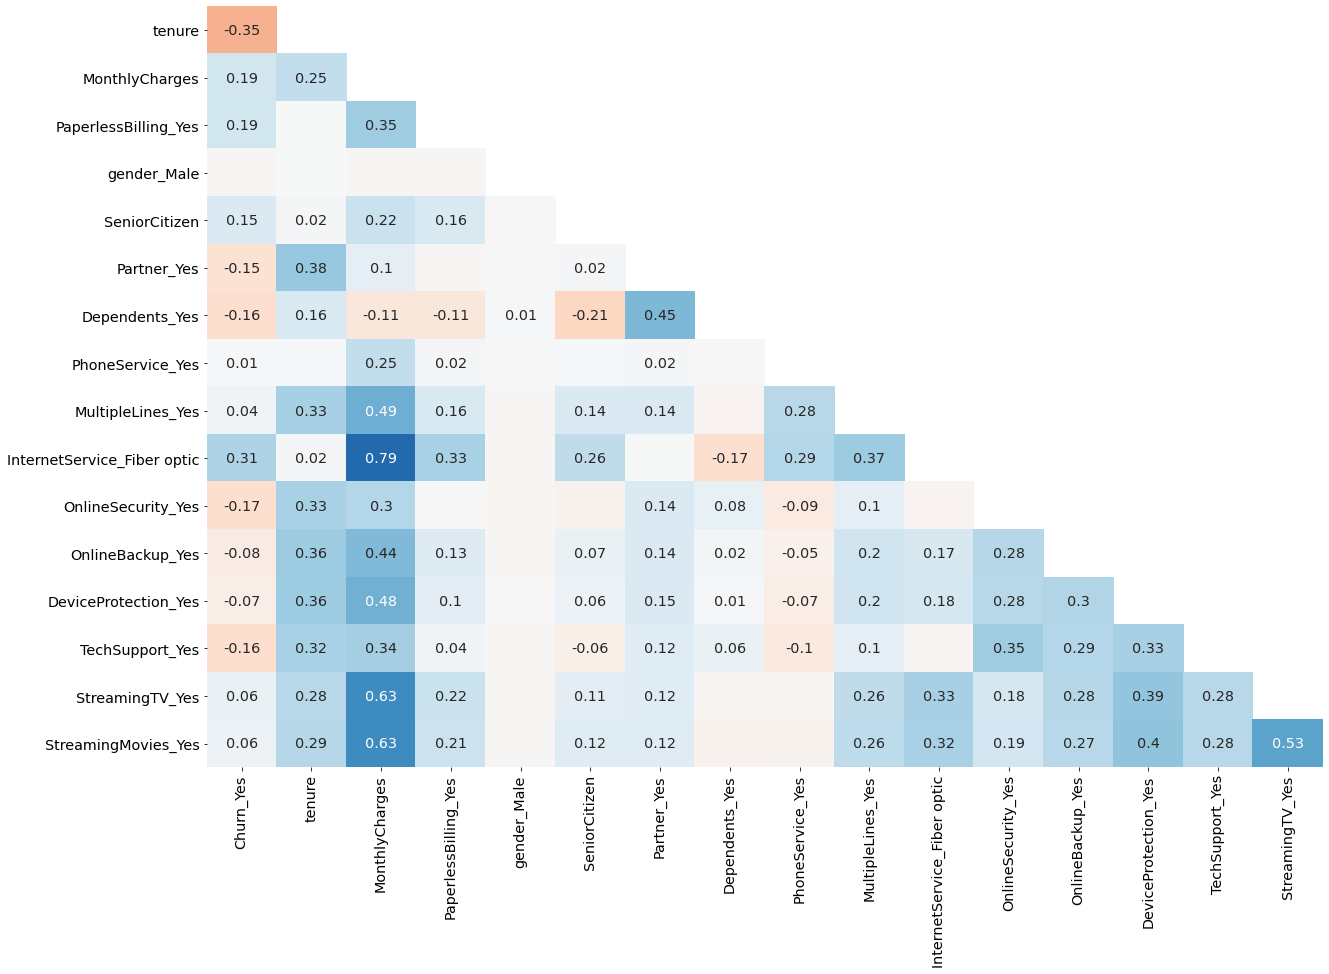

In [83]:
def plot_correlations(df):
    
    # create a correlation matrix.
    correlation = df_4.corr()
    
    # create a mask to avoid repeated values and make
    # the plot easier to read
    correlation = correlation.iloc[1:, :-1]
    mask = np.triu(np.ones_like(correlation), k=1)
    
    # plot a heatmap of the values
    plt.figure(figsize=(20,14))
    ax = sns.heatmap(correlation, vmin=-1, vmax=1, cbar=False,
                     cmap='RdBu', mask=mask, annot=True)
    
    # format the text in the plot to make it easier to read
    for text in ax.texts:
        t = float(text.get_text())
        if -0.05 < t < 0.01:
            text.set_text('')
        else:
            text.set_text(round(t, 2))
        text.set_fontsize('x-large')
    plt.xticks(rotation=90, size='x-large')
    plt.yticks(rotation=0, size='x-large')

    plt.show()
    
plot_correlations(df_4)

% hombres y mujeres hacen churn
% hay de churn
distribucion por categoria
pmf de tenure
barras de tenure con churn
en relacion al churn como se distribuye cada una de ellas.

## Conclusions

Many of the customers that have churned, had hired the Fiber Optic service. Correlation of 0.31.

There's a negative correlation between the number of months the client has had the service and
the churn. -0.35.